## Observations and Insights 

1. Based on the analysis, Capomulin and Ramicane are more effective drug regimens to treat cancer compared with Infubinol and Ceftamin.
2. Capomulin is extremely useful to decrease tumor volume for the selected mouse (x401). Further studies may be needed on additional samples or a bigger scale to validate the result.
3. There is a positive correlation between the weight of the mice and the tumor volume. 

In [216]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how="right", on='Mouse ID')

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [217]:
# Checking the number of mice.
mice_count = len(merged_data["Mouse ID"].value_counts())
mice_count

249

In [218]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [219]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = merged_data.loc[merged_data["Mouse ID"] == "g989", :]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [220]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data.loc[merged_data["Mouse ID"]!="g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [221]:
# Checking the number of mice in the clean DataFrame.
clean_df_mice_count = len(clean_df["Mouse ID"].value_counts())
clean_df_mice_count

248

## Summary Statistics

In [222]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen = clean_df.groupby("Drug Regimen")
tumor_mean = drug_regimen["Tumor Volume (mm3)"].mean()
tumor_median = drug_regimen["Tumor Volume (mm3)"].median()
tumor_var = drug_regimen["Tumor Volume (mm3)"].var()
tumor_std = drug_regimen["Tumor Volume (mm3)"].std()
tumor_sem = drug_regimen["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame({
                        "Mean": tumor_mean,
                        "Median" : tumor_median,
                        "Variance" : tumor_var,
                        "Standard Deviation" : tumor_std,
                        "SEM" : tumor_sem
})
summary.round(2)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [223]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg = clean_df.groupby(["Drug Regimen"]) ["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_agg.round(2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64


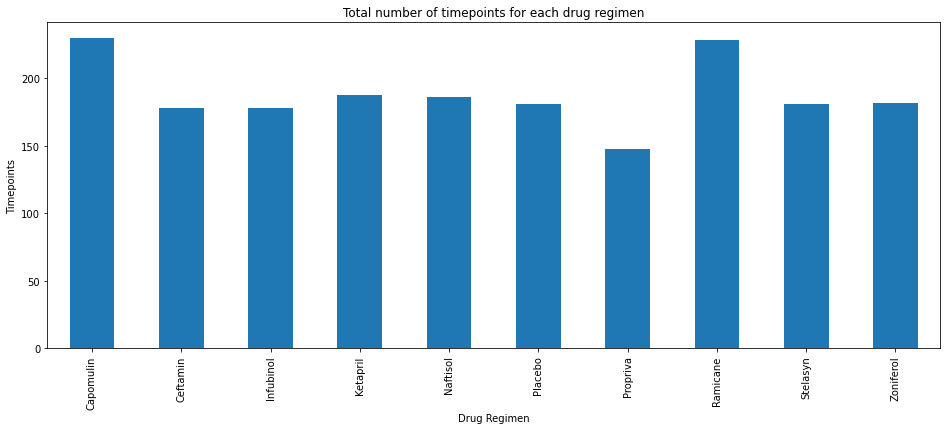

In [224]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint = clean_df.groupby(["Drug Regimen"])["Timepoint"].count()
print(timepoint)
timepoint.plot(kind="bar", figsize=(16,6))
plt.title("Total number of timepoints for each drug regimen")
plt.ylabel("Timepoints")
plt.show()

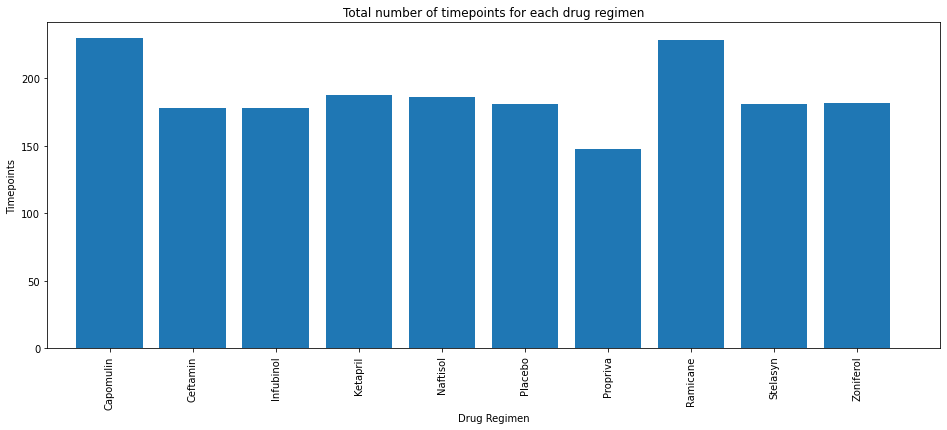

In [225]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.figure(figsize=(16,6))
plt.bar(timepoint.index, timepoint.values)
plt.title("Total number of timepoints for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.xticks(rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.show()

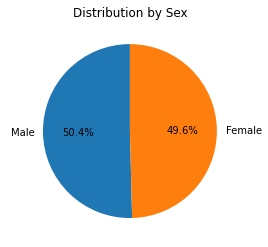

In [233]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drop_duplicate = mouse_metadata[mouse_metadata["Mouse ID"].isin(duplicate_mice) == False]
gender = drop_duplicate["Sex"].value_counts()
sizes = gender.values 
labels = gender.values
gender.plot(kind="pie", autopct="%1.1f%%", startangle=90)

# Add title to chart, then display 
plt.title("Distribution by Sex")
plt.ylabel(" ")
plt.show()

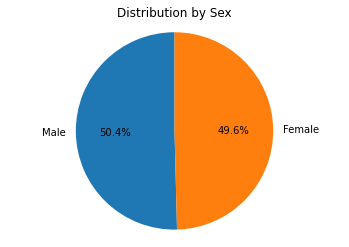

In [232]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
drop_duplicate = mouse_metadata[mouse_metadata["Mouse ID"].isin(duplicate_mice) == False]
gender_pie2 = drop_duplicate["Sex"].value_counts()


plt.pie(gender_pie2, labels = ["Male", "Female"], autopct="%1.1f%%", startangle=90)

# Add title to chart, then display 
plt.title("Distribution by Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [235]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = drug_list.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df = pd.merge(clean_df, greatest_timepoint, how="right", on =["Mouse ID", "Timepoint"])
new_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0


In [243]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    drug_tumor_vol = new_df["Tumor Volume (mm3)"].loc[new_df["Drug Regimen"] == drug]
    
    # add subset 
    tumor_vol_data.append(drug_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = (upperq-lowerq)
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f'For {drug}, Interquartile Range (IQR) is {iqr}.')
    print(f'Values below {lower_bound} can be an outlier.')
    print(f'Values above {upper_bound} can be an outlier.\n')

For Capomulin, Interquartile Range (IQR) is 7.781863460000004.
Values below 20.70456164999999 can be an outlier.
Values above 51.83201549 can be an outlier.

For Ramicane, Interquartile Range (IQR) is 9.098536719999998.
Values below 17.912664470000003 can be an outlier.
Values above 54.30681135 can be an outlier.

For Infubinol, Interquartile Range (IQR) is 11.477135160000003.
Values below 36.83290494999999 can be an outlier.
Values above 82.74144559000001 can be an outlier.

For Ceftamin, Interquartile Range (IQR) is 15.577752179999997.
Values below 25.355449580000002 can be an outlier.
Values above 87.66645829999999 can be an outlier.



<ipython-input-278-f57207c8b56d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drug_list)


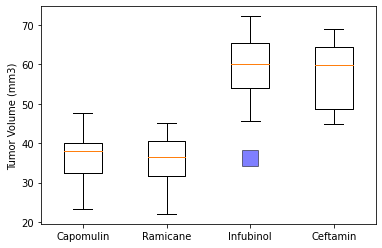

In [278]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
marker = dict(markerfacecolor='blue', alpha = 0.5, marker='s', markersize=16)
fig, ax = plt.subplots()
ax.set_xticklabels(drug_list)
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(tumor_vol_data, flierprops = marker)
plt.show()

## Line and Scatter Plots

In [250]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
selected_mouse = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
selected_mouse.sample()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
349,x401,Capomulin,Female,16,15,5,45.473753,0


Text(0.5, 0, 'Timepoint')

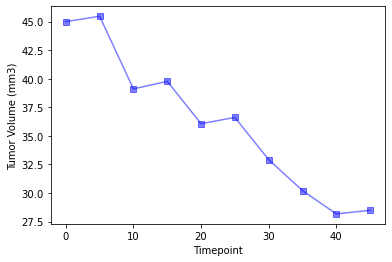

In [258]:
mouse_x401 = clean_df[["Timepoint", "Tumor Volume (mm3)"]] \
            .loc[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"]=="x401")]
plt.plot(mouse_x401['Timepoint'], mouse_x401['Tumor Volume (mm3)'], color="blue", alpha = 0.5, marker='s')
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

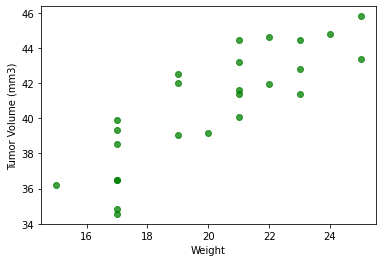

In [274]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = weight.groupby(["Mouse ID"]).mean()

plt.scatter(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"], color="green", alpha = 0.75, marker='o') 
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The r-squared is: 0.71


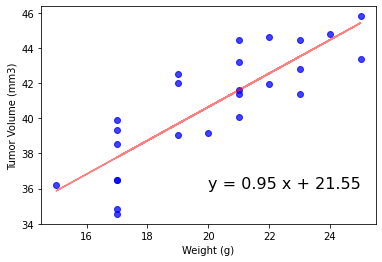

In [296]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"])[0],2)
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"])

regress_values=avg_tumor_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"],color="blue", alpha = 0.75)
plt.plot(avg_tumor_vol["Weight (g)"], regress_values, color='red', alpha = 0.5)
plt.annotate(line_eq,(20,36), fontsize=16)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.show()